In [1]:
import pandas as pd

In [38]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)


In [23]:
property_df = pd.read_csv("HomeHarvest_Chicago.csv")


In [25]:
columns_to_remove = ['primary_photo', 'alt_photos', 'mls', 'status', 'unit', 'city', 'state']

property_df = property_df.drop(columns=columns_to_remove)


In [14]:
property_df.shape

(46014, 27)

In [26]:
property_df.head(5)

,property_url,mls_id,style,street,zip_code,beds,full_baths,half_baths,sqft,year_built,days_on_mls,list_price,list_date,sold_price,last_sold_date,lot_sqft,price_per_sqft,latitude,longitude,stories,hoa_fee,parking_garage
0,https://www.realtor.com/realestateandhomes-detail/7797244224,11456282.0,SINGLE_FAMILY,6127 S Tripp Ave,60629.0,3.0,1.0,NaN,912.0,1945.0,53.0,239000.0,2022-07-07,214500,2022-08-29,NaN,235.0,41.781364,-87.728592,1.0,NaN,2.0
1,https://www.realtor.com/realestateandhomes-detail/7133125936,11429768.0,SINGLE_FAMILY,6238 S Mayfield Ave,60638.0,4.0,2.0,1.0,1712.0,1926.0,81.0,329000.0,2022-06-09,335000,2022-08-29,3781.0,196.0,41.778587,-87.769427,2.0,NaN,2.0
2,https://www.realtor.com/realestateandhomes-detail/8298921491,11358564.0,CONDOS,400 E Randolph St,60601.0,0.0,1.0,NaN,650.0,1964.0,154.0,220000.0,2022-03-28,210000,2022-08-29,NaN,323.0,41.884987,-87.616671,40.0,430.0,1.0
3,https://www.realtor.com/realestateandhomes-detail/7695426483,11468987.0,CONDOS,6121 N Winthrop Ave,60660.0,3.0,2.0,1.0,NaN,2008.0,41.0,635000.0,2022-07-19,625000,2022-08-29,NaN,NaN,41.993031,-87.657910,4.0,343.0,1.0
4,https://www.realtor.com/realestateandhomes-detail/7002373377,11435377.0,CONDOS,2838 W Addison St,60618.0,1.0,1.0,NaN,750.0,1930.0,75.0,119900.0,2022-06-15,102750,2022-08-29,NaN,137.0,41.946948,-87.699666,3.0,185.0,NaN


In [24]:
property_df.status.value_counts()

status
SOLD    46014
Name: count, dtype: int64

In [15]:
missing_mls_count = property_df['mls'].isna().sum()
print("Number of missing 'mls' values:", missing_mls_count)


Number of missing 'mls' values: 9131


In [7]:
property_df.columns

Index(['property_url', 'mls', 'mls_id', 'status', 'style', 'street', 'unit',
       'city', 'state', 'zip_code', 'beds', 'full_baths', 'half_baths', 'sqft',
       'year_built', 'days_on_mls', 'list_price', 'list_date', 'sold_price',
       'last_sold_date', 'lot_sqft', 'price_per_sqft', 'latitude', 'longitude',
       'stories', 'hoa_fee', 'parking_garage', 'primary_photo', 'alt_photos'],
      dtype='object')

In [8]:
property_df.dtypes

property_url       object
mls                object
mls_id            float64
status             object
style              object
street             object
unit               object
city               object
state              object
zip_code          float64
beds              float64
full_baths        float64
half_baths        float64
sqft              float64
year_built        float64
days_on_mls       float64
list_price        float64
list_date          object
sold_price          int64
last_sold_date     object
lot_sqft          float64
price_per_sqft    float64
latitude          float64
longitude         float64
stories           float64
hoa_fee           float64
parking_garage    float64
primary_photo      object
alt_photos         object
dtype: object

In [28]:
property_df['last_sold_date'] = pd.to_datetime(property_df['last_sold_date'])
property_df['list_date'] = pd.to_datetime(property_df['list_date'])


In [29]:
min_date = property_df['last_sold_date'].min()
max_date = property_df['last_sold_date'].max()

print("Minimum Date:", min_date)
print("Maximum Date:", max_date)


Minimum Date: 2022-08-24 00:00:00
Maximum Date: 2023-11-17 00:00:00


In [30]:
min_date = property_df['list_date'].min()
max_date = property_df['list_date'].max()

print("Minimum Date:", min_date)
print("Maximum Date:", max_date)


Minimum Date: 2017-12-17 00:00:00
Maximum Date: 2024-01-06 00:00:00


In [31]:
# Load the neighborhood boundaries data
neighborhoods = gpd.read_file('boundries-chicago.geojson')

property_df['geometry'] = gpd.points_from_xy(property_df['longitude'], property_df['latitude'])
property_df = gpd.GeoDataFrame(property_df, geometry='geometry', crs='EPSG:4326')

# Perform a spatial join
properties_with_neighborhood = gpd.sjoin(property_df, neighborhoods, op='within')


/Users/rashidbaset/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [33]:
properties_with_neighborhood.head(5)

,property_url,mls_id,style,street,zip_code,beds,full_baths,half_baths,sqft,year_built,days_on_mls,list_price,list_date,sold_price,last_sold_date,lot_sqft,price_per_sqft,latitude,longitude,stories,hoa_fee,parking_garage,geometry,index_right,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len
0,https://www.realtor.com/realestateandhomes-detail/7797244224,11456282.0,SINGLE_FAMILY,6127 S Tripp Ave,60629.0,3.0,1.0,NaN,912.0,1945.0,53.0,239000.0,2022-07-07,214500,2022-08-29,NaN,235.0,41.781364,-87.728592,1.0,NaN,2.0,POINT (-87.72859 41.78136),62,WEST LAWN,0,82315301.6831,0,65,65,0,0,41934.4901309
226,https://www.realtor.com/realestateandhomes-detail/7258775322,11453400.0,SINGLE_FAMILY,7232 S Lawndale Ave,60629.0,3.0,2.0,NaN,1212.0,1960.0,52.0,289900.0,2022-07-03,289000,2022-08-24,3750.0,238.0,41.761396,-87.715314,NaN,NaN,2.0,POINT (-87.71531 41.76140),62,WEST LAWN,0,82315301.6831,0,65,65,0,0,41934.4901309
271,https://www.realtor.com/realestateandhomes-detail/7269790632,11379220.0,MULTI_FAMILY,4405 W Marquette Rd,60629.0,4.0,2.0,NaN,NaN,1957.0,127.0,214900.0,2022-04-19,217000,2022-08-24,3750.0,NaN,41.770996,-87.732599,NaN,0.0,NaN,POINT (-87.73260 41.77100),62,WEST LAWN,0,82315301.6831,0,65,65,0,0,41934.4901309
352,https://www.realtor.com/realestateandhomes-detail/9555077296,NaN,SINGLE_FAMILY,3936 W 60th St,60629.0,NaN,NaN,NaN,1050.0,1894.0,NaN,NaN,NaT,300000,2022-08-26,3125.0,286.0,41.784391,-87.721927,1.0,NaN,NaN,POINT (-87.72193 41.78439),62,WEST LAWN,0,82315301.6831,0,65,65,0,0,41934.4901309
725,https://www.realtor.com/realestateandhomes-detail/8722343426,11457989.0,SINGLE_FAMILY,6229 S Komensky Ave,60629.0,4.0,3.0,NaN,2200.0,1924.0,52.0,379000.0,2022-07-12,375000,2022-09-02,3781.0,170.0,41.779588,-87.723657,2.0,0.0,2.0,POINT (-87.72366 41.77959),62,WEST LAWN,0,82315301.6831,0,65,65,0,0,41934.4901309


In [72]:
properties_with_neighborhood.community.value_counts().shape

(77,)

In [42]:
south_side_neighborhoods = [
    "SOUTH SHORE", "AUBURN GRESHAM", "ROSELAND", "CHATHAM", "GREATER GRAND CROSSING",
    "SOUTH CHICAGO", "CHICAGO LAWN", "ENGLEWOOD", "WEST PULLMAN", "GARFIELD RIDGE",
    "ASHBURN", "AVALON PARK", "MORGAN PARK", "GRAND BOULEVARD", "WOODLAWN", "SOUTH LAWNDALE",
    "KENWOOD", "CALUMET HEIGHTS", "DOUGLAS", "GAGE PARK", "WEST ELSDON", "SOUTH DEERING",
    "HEGEWISCH", "AVALON PARK", "WASHINGTON PARK", "ARMOUR SQUARE", "PULLMAN", "OAKLAND",
    "FULLER PARK", "BURNSIDE", "RIVERDALE"
]

southwest_side_neighborhoods = [
    "CLEARING", "WEST LAWN", "WEST ELSDON", "GARFIELD RIDGE",
    "ARCHER HEIGHTS", "BRIGHTON PARK", "MCKINLEY PARK"
]

far_southwest_side_neighborhoods = [
    "MOUNT GREENWOOD", "BEVERLY", "WASHINGTON HEIGHTS"
]

southeast_side_neighborhoods = [
    "HEGEWISCH", "SOUTH DEERING"
]

central = [
    "NEAR NORTH SIDE", "LAKE VIEW", "WEST TOWN", "LINCOLN PARK", "NEAR WEST SIDE", "LOOP", "LOGAN SQUARE",
    "EDGEWATER", "UPTOWN"
]

far_north_side = [
    "ROGERS PARK", "NORWOOD PARK", "DUNNING", "EDISON PARK", "NORTH PARK"
]

north_side = [
    "NORTH CENTER", "LAKE VIEW", "LINCOLN PARK", "EDGEWATER", "UPTOWN"
]

northwest_side = [
    "PORTAGE PARK", "WEST RIDGE", "IRVING PARK", "ALBANY PARK", "JEFFERSON PARK", "MONTCLARE", "HERMOSA"
]

west_side = [
    "AUSTIN", "WEST ENGLEWOOD", "BELMONT CRAGIN", "HUMBOLDT PARK", "AVONDALE", "NEW CITY", "CLEARING",
    "NORTH LAWNDALE", "BRIDGEPORT", "MOUNT GREENWOOD", "FOREST GLEN", "SOUTH LAWNDALE", "KENWOOD",
    "OHARE", "LOWER WEST SIDE", "EAST GARFIELD PARK", "EAST SIDE", "WEST GARFIELD PARK", "CALUMET HEIGHTS",
    "DOUGLAS", "WEST ELSDON", "HEGEWISCH", "AVALON PARK", "MCKINLEY PARK", "HERMOSA", "WASHINGTON PARK",
    "ARMOUR SQUARE", "ARCHER HEIGHTS", "PULLMAN", "OAKLAND", "FULLER PARK", "BURNSIDE", "RIVERDALE"
]


In [45]:
# Combine South Side neighborhoods
south_side = south_side_neighborhoods + southwest_side_neighborhoods + far_southwest_side_neighborhoods + southeast_side_neighborhoods

# Combine Central, North, and West Side neighborhoods
central_north_west = central + far_north_side + north_side + northwest_side + west_side


In [49]:
south_side_df = properties_with_neighborhood[properties_with_neighborhood['community'].isin(south_side)]

south_side_stats = south_side_df.describe()

print(south_side_stats)


             mls_id      zip_code          beds    full_baths   half_baths  \
count  8.806000e+03  11312.000000  10261.000000  10297.000000  2486.000000   
mean   1.168287e+07  60631.347419      3.794659      2.009226     1.090105   
min    1.050987e+07  60608.000000      0.000000      1.000000     1.000000   
25%    1.163033e+07  60620.000000      3.000000      1.000000     1.000000   
50%    1.170919e+07  60629.000000      3.000000      2.000000     1.000000   
75%    1.178396e+07  60638.000000      4.000000      2.000000     1.000000   
max    1.194761e+07  60827.000000     24.000000     11.000000     9.000000   
std    1.422796e+05     14.870765      1.970799      1.025516     0.391980   

               sqft   year_built  days_on_mls    list_price  \
count   8490.000000  9893.000000  8576.000000  8.803000e+03   
mean    1742.307067  1938.368746    86.974930  2.515877e+05   
min        0.000000  1855.000000     0.000000  1.000000e+00   
25%     1088.000000  1916.000000    45.000000

In [51]:
central_north_west_df = properties_with_neighborhood[properties_with_neighborhood['community'].isin(central_north_west)]

central_north_west_stats = central_north_west_df.describe()

print(central_north_west_stats)


             mls_id      zip_code          beds    full_baths   half_baths  \
count  2.824400e+04  34920.000000  30027.000000  30354.000000  7494.000000   
mean   1.169372e+07  60629.778436      3.031538      2.016637     1.087403   
min    7.166451e+06  60016.000000      0.000000      1.000000     1.000000   
25%    1.163944e+07  60613.000000      2.000000      1.000000     1.000000   
50%    1.172310e+07  60626.000000      3.000000      2.000000     1.000000   
75%    1.178952e+07  60645.000000      4.000000      2.000000     1.000000   
max    1.195297e+07  60827.000000     26.000000     21.000000     9.000000   
std    1.458450e+05     20.367306      1.923616      1.016592     0.364176   

                sqft   year_built   days_on_mls    list_price  \
count   21733.000000  27807.00000  26458.000000  2.823900e+04   
mean     1822.482630   1955.94149     75.214642  4.926280e+05   
min         0.000000   1827.00000      0.000000  2.700000e+03   
25%      1066.000000   1920.00000    

In [58]:
print(south_side_df.shape)
print(central_north_west_df.shape)


(11312, 33)
(34920, 33)


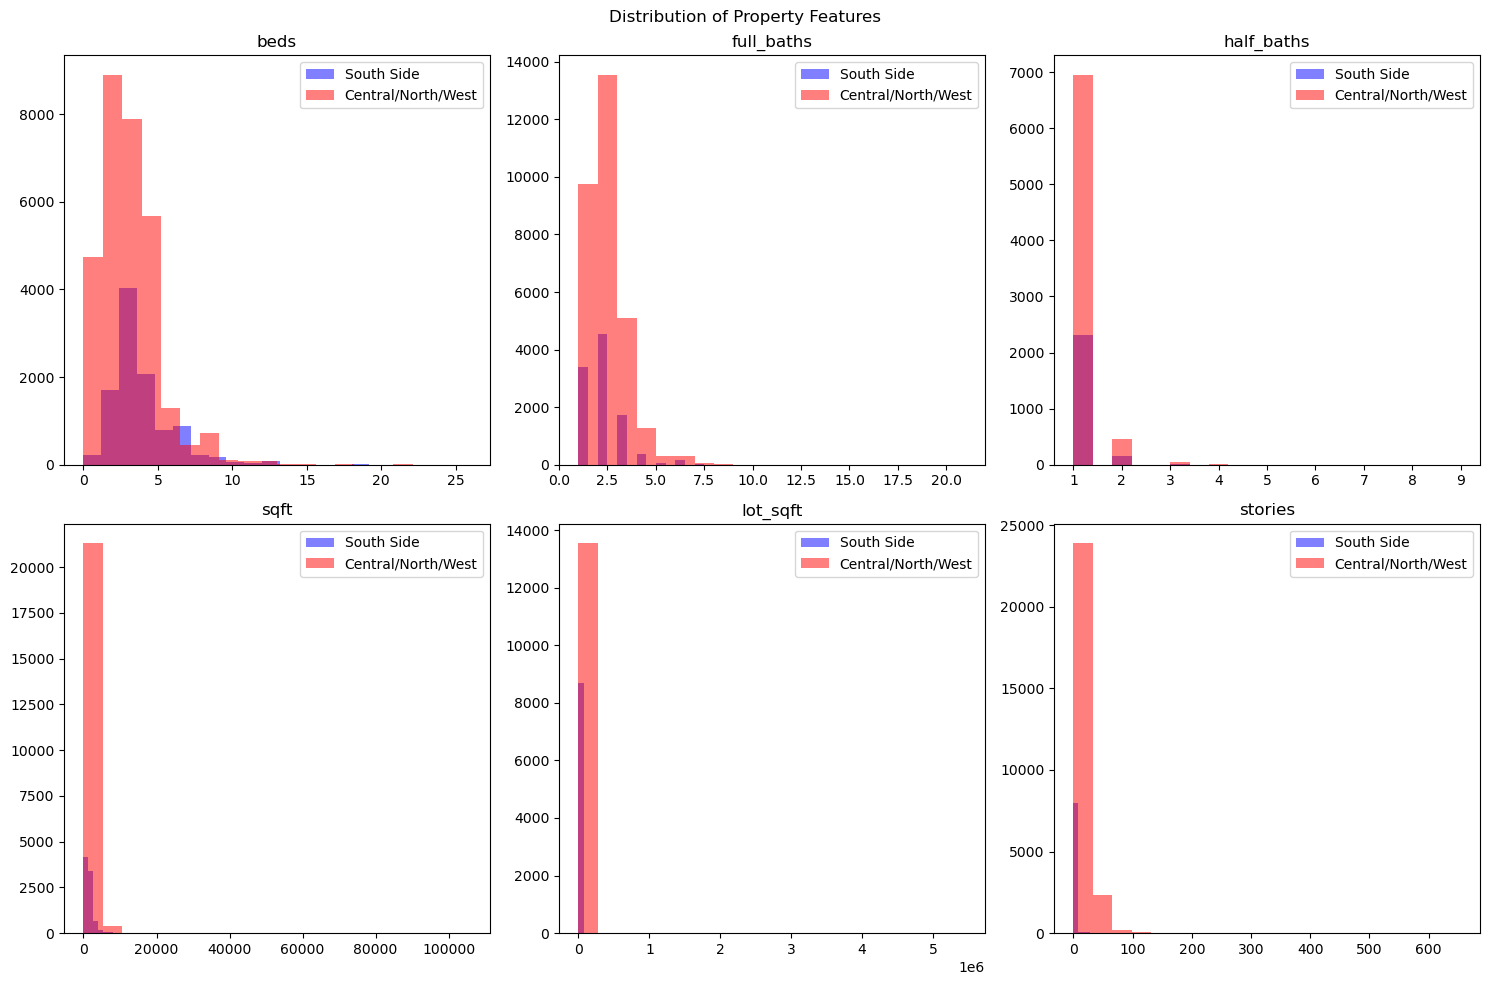

In [56]:
south_side_df = properties_with_neighborhood[properties_with_neighborhood['community'].isin(south_side)]

central_north_west_df = properties_with_neighborhood[properties_with_neighborhood['community'].isin(central_north_west)]

features = ['beds', 'full_baths', 'half_baths', 'sqft', 'lot_sqft', 'stories']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Distribution of Property Features')

for i, feature in enumerate(features):
    ax = axs[i // 3][i % 3]
    ax.hist(south_side_df[feature].dropna(), bins=20, alpha=0.5, label='South Side', color='blue')
    ax.hist(central_north_west_df[feature].dropna(), bins=20, alpha=0.5, label='Central/North/West', color='red')
    ax.set_title(feature)
    ax.legend()

plt.tight_layout()
plt.show()


### Neighborhood & Style

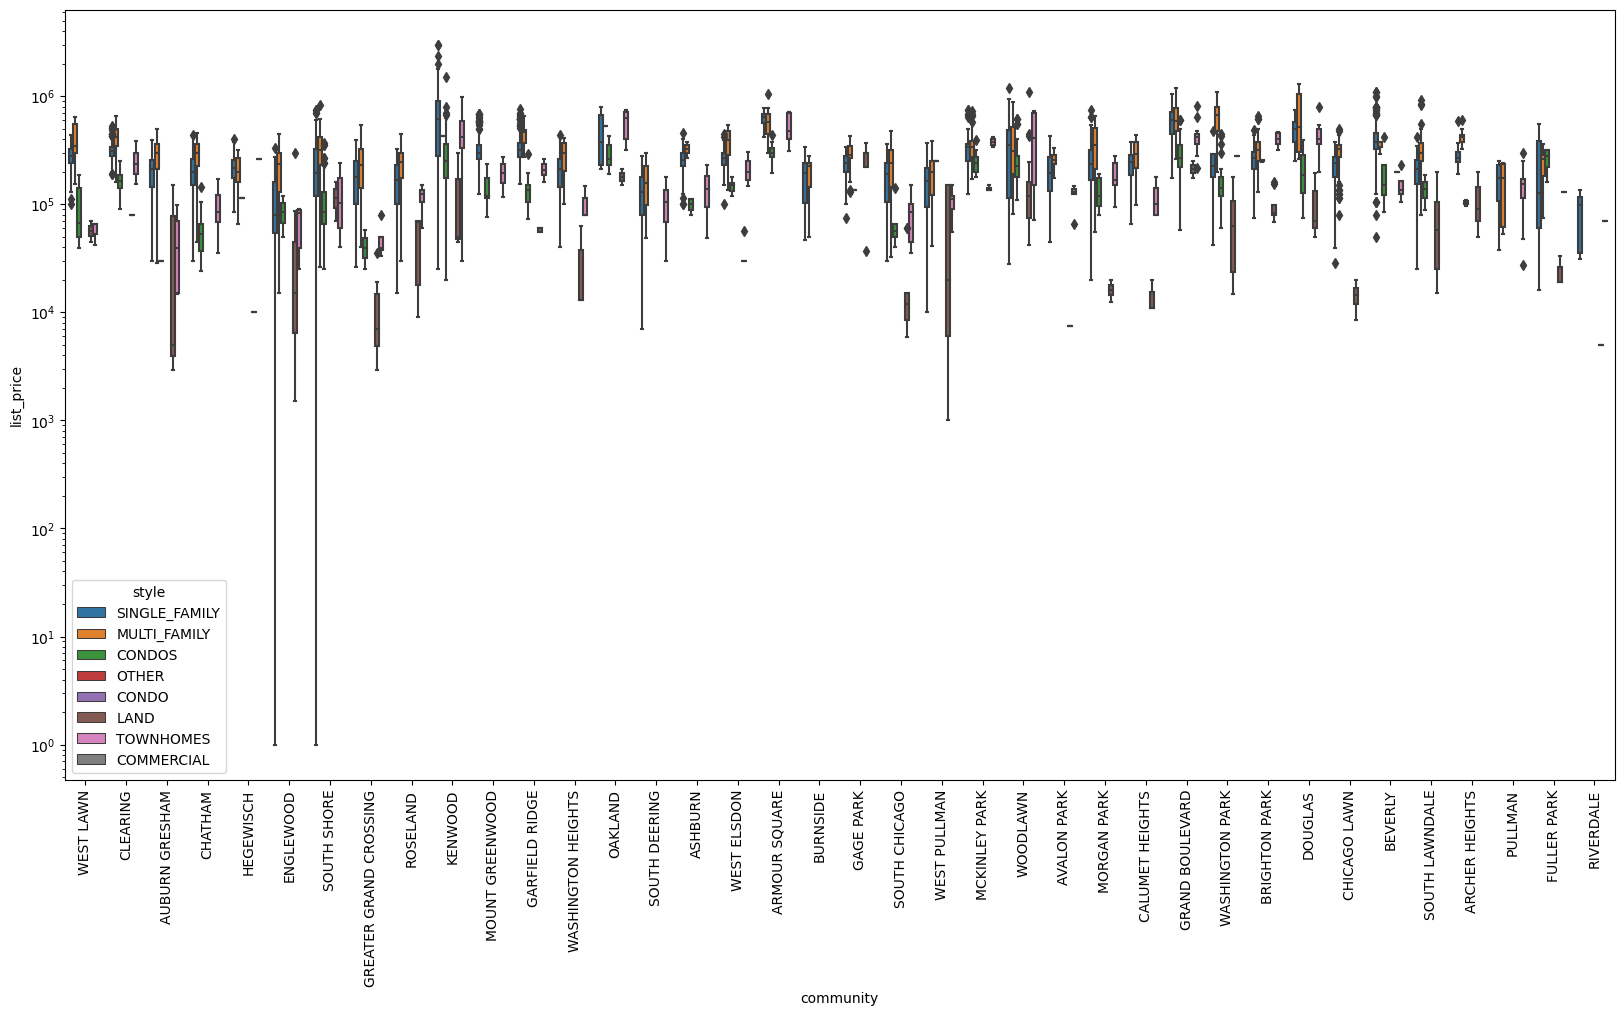

In [62]:
plt.figure(figsize=(20,10)) 
sns.boxplot(x='community', y='list_price', hue='style', data=south_side_df)
plt.xticks(rotation=90)  
plt.yscale('log') 
plt.show()


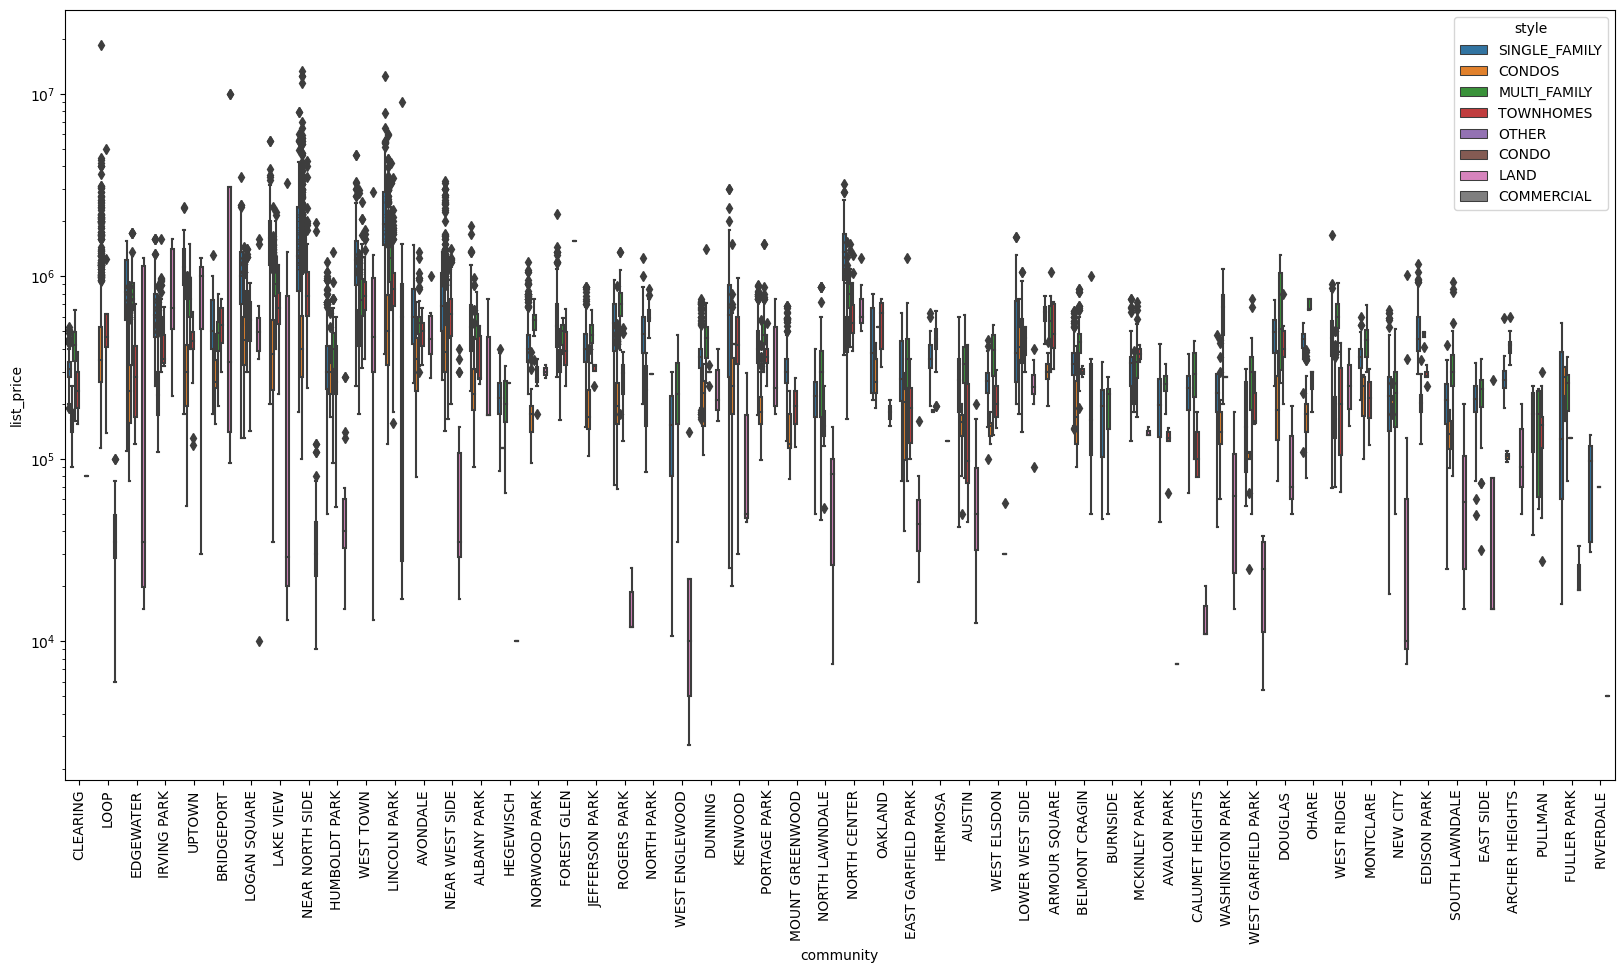

In [69]:
plt.figure(figsize=(20,10))  
sns.boxplot(x='community', y='list_price', hue='style', data=central_north_west_df)
plt.xticks(rotation=90) 
plt.yscale('log')  
plt.show()

In [66]:
# Calculate the proportion of each property style in each dataset
south_side_style_proportions = south_side_df['style'].value_counts(normalize=True)
central_north_west_style_proportions = central_north_west_df['style'].value_counts(normalize=True)

style_summary = pd.DataFrame({
    'South Side': south_side_style_proportions,
    'Central/North/West': central_north_west_style_proportions
})

# Display the summary statistics for property styles
print(style_summary)



               South Side  Central/North/West
style                                        
COMMERCIAL       0.000177            0.000115
CONDO            0.021484            0.103050
CONDOS           0.080187            0.453902
LAND             0.018566            0.016268
MULTI_FAMILY     0.191318            0.125763
OTHER            0.055786            0.023113
SINGLE_FAMILY    0.590399            0.241157
TOWNHOMES        0.042083            0.036632


In [68]:
# Calculate summary statistics for list_price and sold_price in south_side_df by style
south_side_summary = south_side_df.groupby('style')[['list_price', 'sold_price']].describe()

central_north_west_summary = central_north_west_df.groupby('style')[['list_price', 'sold_price']].describe()

print("Summary Statistics for South Side:")
print(south_side_summary)

print("\nSummary Statistics for Central/North/West:")
print(central_north_west_summary)



Summary Statistics for South Side:
              list_price                                                    \
                   count           mean            std      min        25%   
style                                                                        
COMMERCIAL           0.0            NaN            NaN      NaN        NaN   
CONDO                0.0            NaN            NaN      NaN        NaN   
CONDOS             907.0  200960.603087  125667.465165  20000.0  114450.00   
LAND               155.0   84279.741935  117831.720823   1000.0   15000.00   
MULTI_FAMILY      1697.0  304738.892163  160233.399324  15000.0  200000.00   
OTHER                0.0            NaN            NaN      NaN        NaN   
SINGLE_FAMILY     5654.0  248534.307039  145458.228309      1.0  169000.00   
TOWNHOMES          390.0  248813.230769  198380.999047  14900.0  100249.25   

                                             sold_price                \
                    50%       75%

The data provided offers a comprehensive view of real estate statistics across different property styles in the South Side and Central/North/West neighborhoods of Chicago. We can compare these areas across several dimensions:

### Property Styles and Price Points

-   Both regions have a presence of `CONDOS`, `LAND`, `MULTI_FAMILY`, `SINGLE_FAMILY`, and `TOWNHOMES`. `COMMERCIAL` and `OTHER` categories seem to have very few or no listings in some cases, but they stand out in the sold price segment, especially in the `OTHER` category for the South Side with a maximum sold price of over $33 million.

### Price Distribution

-   In both regions, `SINGLE_FAMILY` homes are the most common, with a significant count and a wide range of list and sold prices. The mean list price for `SINGLE_FAMILY` homes is higher in the Central/North/West neighborhoods, which indicates a generally higher real estate market value in these areas compared to the South Side.

-   `CONDOS` are prevalent in both areas as well, but the Central/North/West side shows a higher mean list and sold price, hinting at a more upscale condo market.

-   `MULTI_FAMILY` units in the Central/North/West have a higher mean list and sold price compared to the South Side, reflecting the premium of multi-dwelling units in these more central areas.

### Variability and Range

-   The standard deviation (`std`) in both list and sold prices for all property styles is typically high, indicating a wide range of property values within each category. This suggests that there's a mix of different property values within the same style, which could be due to location, property size, amenities, or other factors.

-   The maximum sold prices for the `OTHER` category in both areas are particularly high, which might indicate rare, high-value transactions such as large commercial deals or sales of unique properties.

### Market Dynamics

-   `TOWNHOMES` and `CONDOS` in the Central/North/West neighborhoods have a higher mean list price and sold price, which likely reflects the urban setting where such property types are in demand and can command higher prices due to amenities, proximity to city centers, or newer developments.

-   `LAND` shows a high standard deviation in sold prices, especially in the Central/North/West neighborhoods, indicating that there may be a few very valuable parcels pulling up the average, perhaps due to location or development potential.

### Absence of Data

-   There's a notable absence of data in the `COMMERCIAL` and `CONDO` categories for list prices in the South Side, which may indicate a lack of listings in the dataset or could be a data collection issue.

### Summary

The South Side shows a more affordable housing market, with lower mean list and sold prices across most property styles, except for the `OTHER` category with a high max sold price indicating occasional high-value sales. The Central/North/West neighborhoods demonstrate higher real estate values across the board, with `SINGLE_FAMILY` homes and `CONDOS` showing notably higher prices on average. This reflects the premium on property in these more central areas, likely due to a combination of factors like location desirability, availability of amenities, and newer developments.

Given the large range and standard deviation in prices, especially for `LAND` and `MULTI_FAMILY` units, individual property analysis is necessary to understand the specific factors contributing to high variability within these categories.

For further analysis, especially for categories with high standard deviations, examining the interquartile range can help understand the central tendency and variability of prices without the influence of extreme values. Additionally, understanding the context behind the `OTHER` category's high maximum sold prices could reveal important insights into the real estate dynamics of both neighborhoods.

#### Summary Statistics by Neighborhood and Style

In [76]:
neighborhoods = {
    'South Side': south_side_neighborhoods,
    'Southwest Side': southwest_side_neighborhoods,
    'Far Southwest Side': far_southwest_side_neighborhoods,
    'Southeast Side': southeast_side_neighborhoods,
    'Central': central,
    'Far North Side': far_north_side,
    'North Side': north_side,
    'Northwest Side': northwest_side,
    'West Side': west_side
}

summary_stats_combined = pd.DataFrame()

for region_name, neighborhood_list in neighborhoods.items():
    neighborhood_df = properties_with_neighborhood[properties_with_neighborhood['community'].isin(neighborhood_list)]
    
    neighborhood_summary = neighborhood_df.groupby(['community', 'style']).agg({
        'list_price': ['count', 'mean', 'median', 'std', 'min', 'max'],
        'sold_price': ['count', 'mean', 'median', 'std', 'min', 'max']
    })
    
    neighborhood_summary.columns = ['_'.join(col).strip() for col in neighborhood_summary.columns.values]
    
    neighborhood_summary.reset_index(inplace=True)
    
    neighborhood_summary['Region'] = region_name
    
    summary_stats_combined = pd.concat([summary_stats_combined, neighborhood_summary], ignore_index=True)

summary_stats_combined['avg_price_difference'] = summary_stats_combined['sold_price_mean'] - summary_stats_combined['list_price_mean']

summary_stats_combined.sort_values(by=['Region', 'community', 'style'], inplace=True)

pd.options.display.float_format = '{:,.2f}'.format

summary_stats_combined.to_csv('summary_stats_by_neighborhood.csv', index=False)

print(summary_stats_combined.head())


     community         style  list_price_count  list_price_mean  \
259  EDGEWATER         CONDO                 0              NaN   
260  EDGEWATER        CONDOS               890       261,362.86   
261  EDGEWATER          LAND                 8       465,500.00   
262  EDGEWATER  MULTI_FAMILY                60       830,823.25   
263  EDGEWATER         OTHER                 0              NaN   

     list_price_median  list_price_std  list_price_min  list_price_max  \
259                NaN             NaN             NaN             NaN   
260         233,900.00      134,545.31       75,000.00      879,900.00   
261          35,000.00      610,025.06       15,000.00    1,250,000.00   
262         749,497.50      303,356.64      325,000.00    1,725,000.00   
263                NaN             NaN             NaN             NaN   

     sold_price_count  sold_price_mean  sold_price_median  sold_price_std  \
259               132       246,544.51         250,000.00      114,201.92  

In [82]:
neighborhoods = {
    'South Side': south_side_neighborhoods,
    'Southwest Side': southwest_side_neighborhoods,
    'Far Southwest Side': far_southwest_side_neighborhoods,
    'Southeast Side': southeast_side_neighborhoods,
    'Central': central,
    'Far North Side': far_north_side,
    'North Side': north_side,
    'Northwest Side': northwest_side,
    'West Side': west_side
}

summary_stats_combined = pd.DataFrame()

for region_name, neighborhood_list in neighborhoods.items():
    neighborhood_df = properties_with_neighborhood[properties_with_neighborhood['community'].isin(neighborhood_list)]
    
    neighborhood_summary = neighborhood_df.groupby(['community', 'style']).agg({
        'list_price': ['count', 'mean', 'median', 'std', 'min', 'max'],
        'sold_price': ['count', 'mean', 'median', 'std', 'min', 'max'],
        'days_on_mls': ['mean']  
    })
    
    neighborhood_summary.columns = ['_'.join(col).strip() for col in neighborhood_summary.columns.values]
    
    neighborhood_summary.reset_index(inplace=True)
    
    neighborhood_summary['Region'] = region_name
    
    summary_stats_combined = pd.concat([summary_stats_combined, neighborhood_summary], ignore_index=True)

summary_stats_combined['avg_price_difference'] = summary_stats_combined['sold_price_mean'] - summary_stats_combined['list_price_mean']

summary_stats_combined.sort_values(by=['Region', 'community', 'style'], inplace=True)

pd.options.display.float_format = '{:,.2f}'.format

summary_stats_combined.to_csv('summary_stats_by_neighborhood.csv', index=False)

print(summary_stats_combined.head())


     community         style  list_price_count  list_price_mean  \
259  EDGEWATER         CONDO                 0              NaN   
260  EDGEWATER        CONDOS               890       261,362.86   
261  EDGEWATER          LAND                 8       465,500.00   
262  EDGEWATER  MULTI_FAMILY                60       830,823.25   
263  EDGEWATER         OTHER                 0              NaN   

     list_price_median  list_price_std  list_price_min  list_price_max  \
259                NaN             NaN             NaN             NaN   
260         233,900.00      134,545.31       75,000.00      879,900.00   
261          35,000.00      610,025.06       15,000.00    1,250,000.00   
262         749,497.50      303,356.64      325,000.00    1,725,000.00   
263                NaN             NaN             NaN             NaN   

     sold_price_count  sold_price_mean  sold_price_median  sold_price_std  \
259               132       246,544.51         250,000.00      114,201.92  

In [78]:
average_prices = summary_stats_combined.groupby('community').agg({
    'list_price_mean': 'mean',
    'sold_price_mean': 'mean'
}).reset_index()

# Calculate the appreciation as the difference between sold and list prices
average_prices['appreciation'] = average_prices['sold_price_mean'] - average_prices['list_price_mean']

# Identify where properties are appreciating the most by sorting the DataFrame based on appreciation
average_prices_sorted = average_prices.sort_values(by='appreciation', ascending=False)

# Identify the neighborhoods with the highest average sold price, which indicates high market activity
top_sold_prices = average_prices_sorted.sort_values(by='sold_price_mean', ascending=False)

print("Neighborhoods with the Highest Appreciation:")
print(average_prices_sorted.head(10))

print("\nNeighborhoods with the Highest Average Sold Price:")
print(top_sold_prices.head(10))


Neighborhoods with the Highest Appreciation:
          community  list_price_mean  sold_price_mean  appreciation
39             LOOP       513,767.59    29,121,809.33 28,608,041.74
56        RIVERDALE        52,945.79     8,439,371.21  8,386,425.42
45  NEAR NORTH SIDE     1,049,133.49     3,973,026.25  2,923,892.76
35          KENWOOD       414,591.56     2,789,146.29  2,374,554.73
54     PORTAGE PARK       374,110.62     1,496,846.37  1,122,735.76
46   NEAR WEST SIDE       511,762.64     1,602,773.57  1,091,010.93
57      ROGERS PARK       359,969.71     1,028,004.47    668,034.76
72        WEST TOWN       836,328.64     1,424,815.09    588,486.45
3           ASHBURN       205,167.13       780,229.36    575,062.22
62      SOUTH SHORE       179,848.32       707,392.13    527,543.81

Neighborhoods with the Highest Average Sold Price:
          community  list_price_mean  sold_price_mean  appreciation
39             LOOP       513,767.59    29,121,809.33 28,608,041.74
56        RIVERDALE

In [86]:
price_means = summary_stats_combined.groupby('community').agg({
    'list_price_mean': 'mean',
    'sold_price_mean': 'mean'
}).reset_index()

# Calculate price appreciation for each community
price_means['price_appreciation'] = price_means['sold_price_mean'] - price_means['list_price_mean']

market_activity = summary_stats_combined.groupby('community').agg({
    'sold_price_count': 'sum',  # Sum the counts to get total volume of sales
    'days_on_mls_mean': 'mean'  
}).reset_index()

market_activity = market_activity.merge(price_means[['community', 'price_appreciation']], on='community', how='left')

# Sort by transaction volume and days on market to find the most active markets
market_activity_sorted = market_activity.sort_values(by=['sold_price_count', 'days_on_mls_mean'], ascending=[False, True])

# Calculate an activity score
market_activity['activity_score'] = market_activity['sold_price_count'] / market_activity['days_on_mls_mean']

# Sort activity score to see most active markets
most_active_markets = market_activity.sort_values(by='activity_score', ascending=False)

print("Most Active Markets:")
print(most_active_markets.head(20))


Most Active Markets:
          community  sold_price_count  days_on_mls_mean  price_appreciation  \
36        LAKE VIEW              6252             73.72          -82,753.69   
37     LINCOLN PARK              4192             86.36          244,492.81   
63           UPTOWN              2300             66.27          297,472.31   
21        EDGEWATER              2464             74.71          419,383.23   
45  NEAR NORTH SIDE              4344            147.41        2,923,892.76   
72        WEST TOWN              2340             87.59          588,486.45   
46   NEAR WEST SIDE              1761             96.44        1,091,010.93   
27   GARFIELD RIDGE              1016             58.36           31,056.34   
16         CLEARING               802             54.85           -3,797.32   
38     LOGAN SQUARE              1249             90.28           68,148.92   
48     NORTH CENTER               910             65.91           22,373.09   
39             LOOP            